# <center>TP 3</center>


- Decouverte de l'Environement

In [4]:
from env_traffic import TrafficEnvironment
import numpy as np
import matplotlib.pyplot as plt

# Test the environment
env = TrafficEnvironment()
state = env.reset()

print("🚦 Initial Traffic Light Simulation 🚦")
print("State Format: [Cars North, Cars South, Cars East, Cars West]")
print("Actions: 0 = Keep Current Light, 1 = Switch Light")
print(f"Initial state: {state} (NS Green, EW Red)")

for i in range(10):
    action = np.random.choice([0, 1])
    next_state, reward = env.step(action)

    light_status = "NS Green, EW Red" if env.current_light == 0 else "EW Green, NS Red"
    print(f"Step {i + 1}:")
    print(f"  ➡ Action Taken: {action} ({'Switch' if action == 1 else 'Keep'})")
    print(f"  🚥 Light Status: {light_status}")
    print(f"  🏎 Cars State: {next_state}")
    print(f"  🎯 Reward (Cars Passed): {reward}")
    print("-" * 40)

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [5 3 2 8] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [6 3 0 5]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 2:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [4 1 2 7]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 2 2 9]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 4:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [2 4 2 5]
  🎯 Reward (Cars Passed): 6
----------------------------------------
Step 5:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [0 0 2 7]
  🎯 Reward (Cars Passed): 5
----------------

- Exercice2: Implementation de Q-Learning

[[[[[[9.00000000e-03 0.00000000e+00]
     [3.20131937e-02 0.00000000e+00]]

    [[9.19414478e-01 0.00000000e+00]
     [2.51513525e-01 4.03655835e-01]]

    [[0.00000000e+00 1.34671207e+00]
     [1.00000000e-01 0.00000000e+00]]

    ...

    [[0.00000000e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[0.00000000e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[2.61000000e-02 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]]


   [[[1.09104734e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[2.62599942e+00 0.00000000e+00]
     [4.21971650e-01 0.00000000e+00]]

    [[1.91711058e+00 4.07066360e-01]
     [7.17765901e-01 0.00000000e+00]]

    ...

    [[7.75676773e-02 0.00000000e+00]
     [4.00000000e-01 0.00000000e+00]]

    [[0.00000000e+00 5.00000000e-01]
     [2.00000000e-01 0.00000000e+00]]

    [[1.79046089e-01 4.25000000e-01]
     [0.00000000e+00 0.00000000e+00]]]


   [[[2.67028669e-01 0.00000000e+00]
     [0.00000000e+00 0.000000

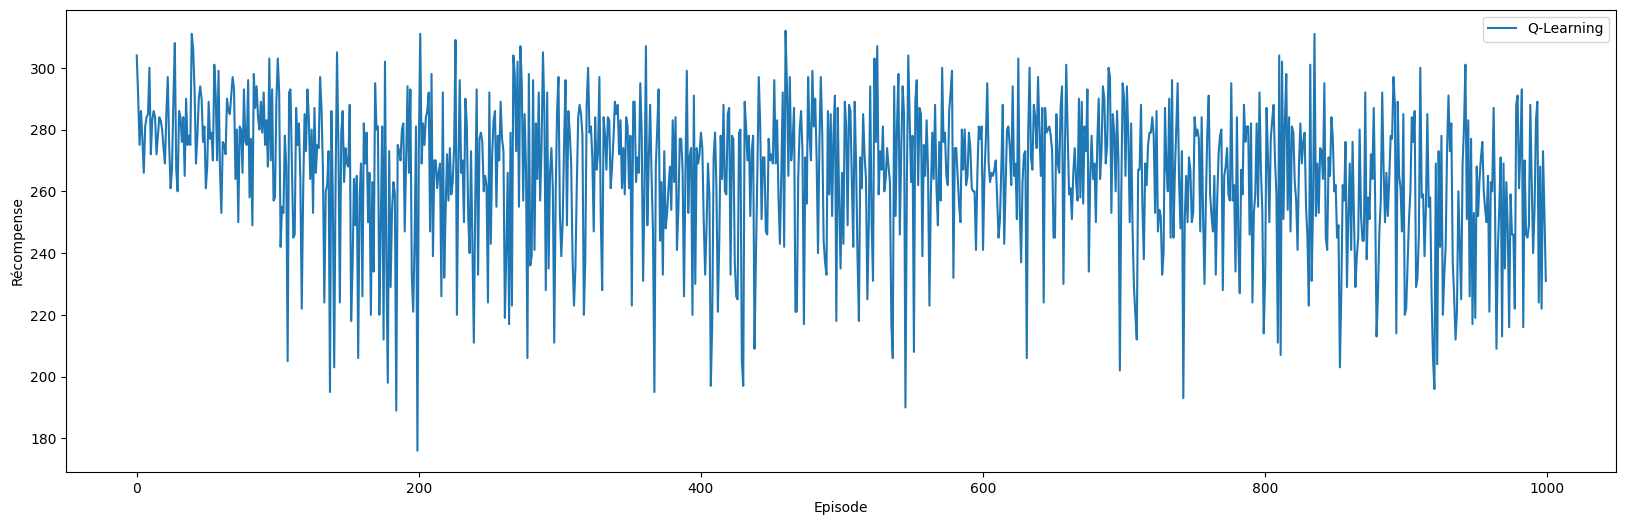

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        # Q-Table : Q[N, S, E, W, Light, Action]
        self.Q = np.zeros((10, 10, 10, 10, 2, 2))

    def discretize_state(self, state, current_light):
        
        N = min(state[0], 9)
        S = min(state[1], 9)
        E = min(state[2], 9)
        W = min(state[3], 9)
        return (N, S, E, W, current_light)

    def choose_action(self, state):
        # epsilon-greedy
        if np.random.rand() < self.epsilon:
            return np.random.randint(2)  # 0 ou 1
        else:
            return np.argmax(self.Q[state])

    def update(self, old_state, action, reward, new_state):
        # Q-Learning update
        old_value = self.Q[old_state][action]
        best_next_action = np.argmax(self.Q[new_state])
        td_target = reward + self.gamma * self.Q[new_state][best_next_action]
        self.Q[old_state][action] = old_value + self.alpha * (td_target - old_value)

def train_qlearning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    agent = QLearningAgent(alpha, gamma, epsilon)
    rewards_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        current_light = env.current_light
        discrete_state = agent.discretize_state(state, current_light)
        total_reward = 0

        # On peut fixer un nombre max de steps par épisode
        for t in range(100):
            action = agent.choose_action(discrete_state)
            next_state, reward = env.step(action)
            next_light = env.current_light

            new_discrete_state = agent.discretize_state(next_state, next_light)

            agent.update(discrete_state, action, reward, new_discrete_state)

            discrete_state = new_discrete_state
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return agent, rewards_per_episode



env = TrafficEnvironment()
q_agent, q_learning_rewards = train_qlearning(env, episodes=1000)
# Affichage de la Q-table finale :
print(q_agent.Q)

# Tracé des récompenses
plt.figure(figsize=(20, 6))
plt.plot(q_learning_rewards, label="Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Récompense")
plt.legend()
plt.show()


- Exercice 3: Implentation de Sarsa

[[[[[[6.17011141e-02 0.00000000e+00]
     [1.00506390e-01 0.00000000e+00]]

    [[4.52744372e-01 1.75284400e-01]
     [1.00000000e-01 0.00000000e+00]]

    [[6.65426784e-01 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    ...

    [[0.00000000e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[0.00000000e+00 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[4.34016000e-02 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]]


   [[[1.50805583e-01 0.00000000e+00]
     [0.00000000e+00 3.71748933e-01]]

    [[8.22100966e-01 0.00000000e+00]
     [9.17637827e-01 0.00000000e+00]]

    [[1.04205475e+00 0.00000000e+00]
     [3.43045943e-01 0.00000000e+00]]

    ...

    [[1.45800000e-03 0.00000000e+00]
     [5.72419979e-01 0.00000000e+00]]

    [[3.42000000e-02 0.00000000e+00]
     [0.00000000e+00 0.00000000e+00]]

    [[0.00000000e+00 1.60478040e+00]
     [0.00000000e+00 0.00000000e+00]]]


   [[[5.09461591e-02 0.00000000e+00]
     [6.78857530e-01 0.000000

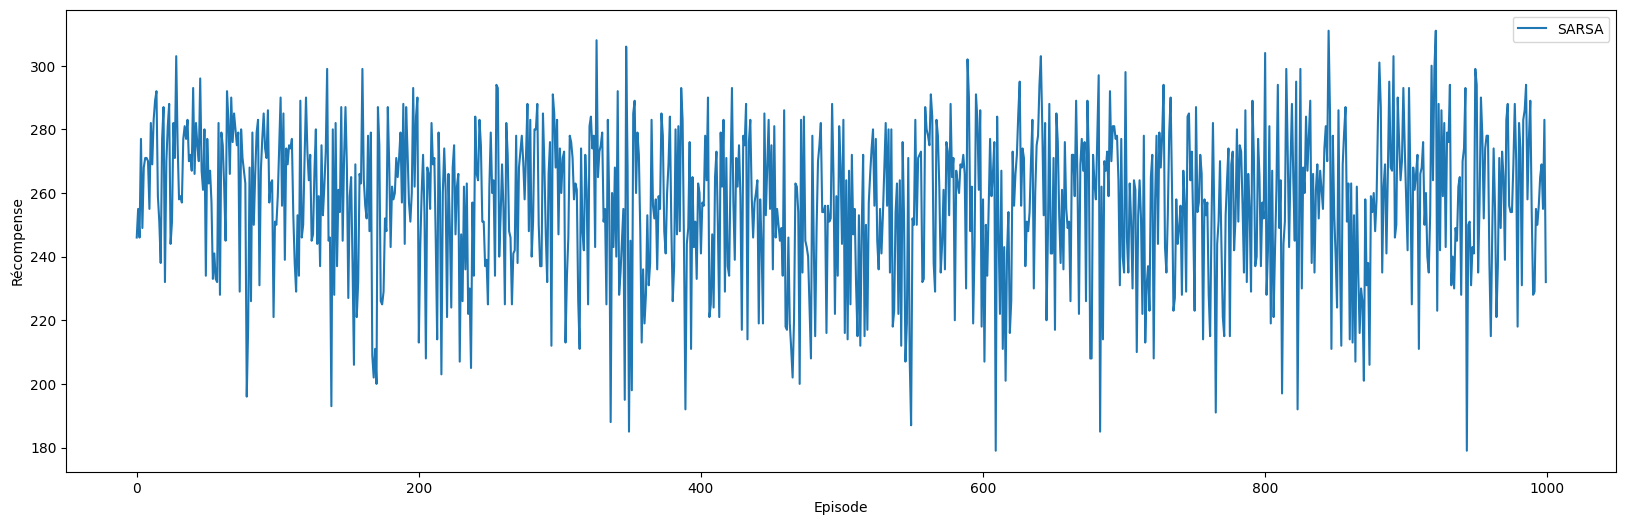

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SARSAAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((10, 10, 10, 10, 2, 2))

    def discretize_state(self, state, current_light):
        N = min(state[0], 9)
        S = min(state[1], 9)
        E = min(state[2], 9)
        W = min(state[3], 9)
        return (N, S, E, W, current_light)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(2)
        else:
            return np.argmax(self.Q[state])

    def update(self, old_state, old_action, reward, new_state, new_action):
        old_value = self.Q[old_state][old_action]
        td_target = reward + self.gamma * self.Q[new_state][new_action]
        self.Q[old_state][old_action] = old_value + self.alpha * (td_target - old_value)

def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    agent = SARSAAgent(alpha, gamma, epsilon)
    rewards_per_episode = []

    for ep in range(episodes):
        state = env.reset()
        current_light = env.current_light
        discrete_state = agent.discretize_state(state, current_light)
        action = agent.choose_action(discrete_state)

        total_reward = 0

        for t in range(100):
            next_state, reward = env.step(action)
            next_light = env.current_light
            new_discrete_state = agent.discretize_state(next_state, next_light)

            # Choisir l'action suivante a'
            next_action = agent.choose_action(new_discrete_state)

            # Mise à jour SARSA
            agent.update(discrete_state, action, reward, new_discrete_state, next_action)

            discrete_state = new_discrete_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    return agent, rewards_per_episode


env = TrafficEnvironment()
sarsa_agent, sarsa_rewards = train_sarsa(env, episodes=1000)
print(sarsa_agent.Q)

# Tracé
plt.figure(figsize=(20, 6))
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Episode")
plt.ylabel("Récompense")
plt.legend()
plt.show()


- Analyse et visualisation des resultats

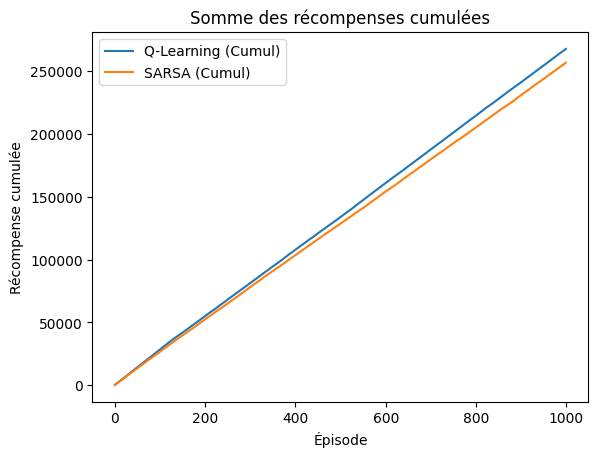

In [16]:
cumulative_q = np.cumsum(q_learning_rewards)
cumulative_sarsa = np.cumsum(sarsa_rewards)

plt.plot(cumulative_q, label="Q-Learning (Cumul)")
plt.plot(cumulative_sarsa, label="SARSA (Cumul)")
plt.xlabel("Épisode")
plt.ylabel("Récompense cumulée")
plt.title("Somme des récompenses cumulées")
plt.legend()
plt.show()


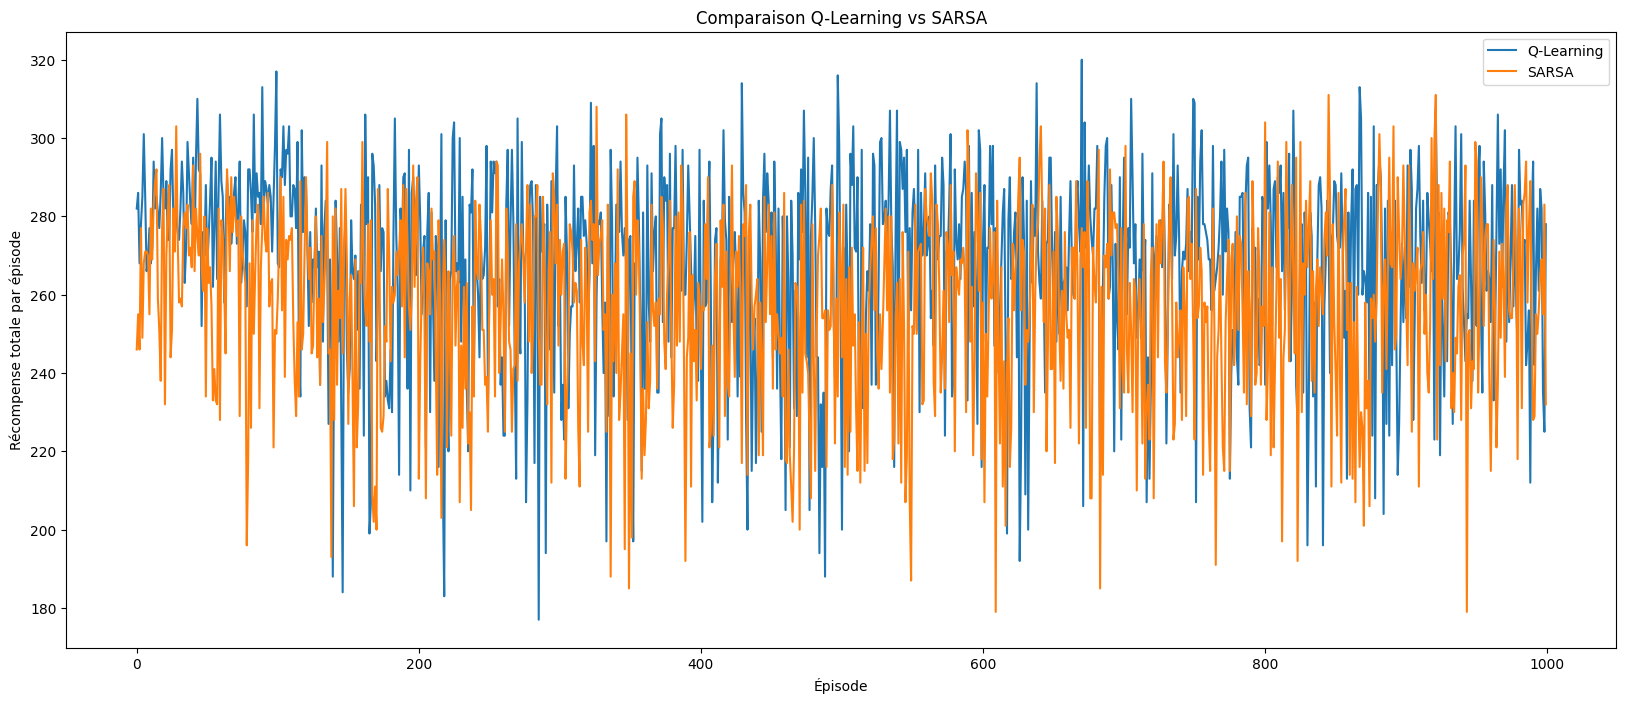

In [ ]:
# q_learning_rewards et sarsa_rewards

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))

plt.plot(q_learning_rewards, label="Q-Learning")
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Épisode")
plt.ylabel("Récompense totale par épisode")
plt.title("Comparaison Q-Learning vs SARSA")
plt.legend()
plt.show()
